In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, models

In [3]:
Classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [4]:
#Datadirectory = r"C:\Users\Yaser\OneDrive\01. MSc Data Analytics\08. Neural Networks\Group Project\Data\train"
Datadirectory = r"C:\Users\minha\OneDrive\Postgrad\MTH767P - Neural Networks\archive\train"

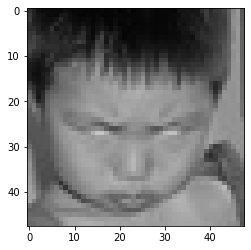

In [5]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
      # remove second break to see all seven classes

In [6]:
img_size = 48

## Loading Training Set

In [7]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                    print(e)
                    pass

    

In [8]:
create_training_data()

In [9]:
np.array(training_data).shape

C:\Users\minha\AppData\Local\Temp/ipykernel_15344/543908747.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(training_data).shape


(28709, 2)

In [10]:
import random
random.shuffle(training_data)

In [11]:
train_images = []
train_labels = []

for features, labels in training_data:
    train_images.append(features)
    train_labels.append(labels)

train_images = np.array(train_images).reshape(-1, img_size, img_size, 1)
train_labels = np.array(train_labels)[0:]


In [12]:
train_images.shape

(28709, 48, 48, 1)

In [13]:
train_labels.shape

(28709,)

In [14]:
#train_images = train_images[11000,:]

In [15]:
x = train_images[0:]

In [16]:
x.shape

(28709, 48, 48, 1)

In [17]:
# Normalizing to between 0 and 1

train_images = x/255.0

## Loading Testing Set

In [18]:
#Datadirectory_test = r"C:\Users\Yaser\OneDrive\01. MSc Data Analytics\08. Neural Networks\Group Project\Data\test"
Datadirectory_test = r"C:\Users\minha\OneDrive\Postgrad\MTH767P - Neural Networks\archive\test"


In [19]:
testing_data = []

def create_testing_data():
    for category in Classes:
        path = os.path.join(Datadirectory_test, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array = cv2.resize(img_array, (img_size,img_size))
                testing_data.append([new_array,class_num])
            except Exception as e:
                    pass

In [20]:
create_testing_data()

In [21]:
np.array(testing_data).shape

C:\Users\minha\AppData\Local\Temp/ipykernel_15344/47909274.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(testing_data).shape


(7178, 2)

In [22]:
random.shuffle(testing_data)

In [23]:
test_images = []
test_labels = []

for features, labels in testing_data:
    test_images.append(features)
    test_labels.append(labels)

test_images = np.array(test_images).reshape(-1, img_size, img_size, 1)
test_labels = np.array(test_labels)[6000:]

In [24]:
y = test_images[6000:]
test_images = y/255.0

In [25]:
len(test_images)

1178

## Training with Convolutional Neural Network

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [28]:
# conv2D outputs of (None, 57, 57, 64) got flattened into vectors of 36928

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
898/898 [==============================] - 264s 293ms/step - loss: 1.7627 - accuracy: 0.2829 - val_loss: 1.6170 - val_accuracy: 0.3812
Epoch 2/50
898/898 [==============================] - 265s 295ms/step - loss: 1.5653 - accuracy: 0.3961 - val_loss: 1.4985 - val_accuracy: 0.4321
Epoch 3/50
898/898 [==============================] - 163s 181ms/step - loss: 1.4646 - accuracy: 0.4411 - val_loss: 1.4427 - val_accuracy: 0.4465
Epoch 4/50
898/898 [==============================] - 108s 120ms/step - loss: 1.3866 - accuracy: 0.4700 - val_loss: 1.3354 - val_accuracy: 0.4898
Epoch 5/50
898/898 [==============================] - 118s 131ms/step - loss: 1.3223 - accuracy: 0.4966 - val_loss: 1.2808 - val_accuracy: 0.5000
Epoch 6/50
898/898 [==============================] - 117s 130ms/step - loss: 1.2692 - accuracy: 0.5205 - val_loss: 1.2370 - val_accuracy: 0.5331
Epoch 7/50
898/898 [==============================] - 117s 131ms/step - loss: 1.2232 - accuracy: 0.5383 - val_loss: 1.2074 -

In [82]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss, val_acc)

37/37 [==============================] - 1s 26ms/step - loss: 1.2460 - accuracy: 0.6529
1.2459899187088013 0.6529173027392780


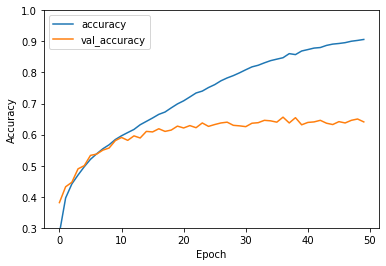

In [85]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='upper left')

In [76]:
lol= model.predict(test_images)
lol=np.argmax(lol, axis=1) 

In [81]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test_labels.reshape(-1), lol)

# Normalizing matrix for more accurate results
cf_matrix = np.around(cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

print(cf_matrix)

[[0.58 0.01 0.08 0.06 0.12 0.15 0.  ]
 [0.15 0.7  0.   0.05 0.05 0.05 0.  ]
 [0.16 0.   0.4  0.05 0.1  0.2  0.09]
 [0.03 0.   0.03 0.88 0.02 0.03 0.01]
 [0.06 0.01 0.1  0.09 0.55 0.18 0.01]
 [0.09 0.   0.11 0.1  0.17 0.5  0.03]
 [0.05 0.   0.06 0.04 0.02 0.02 0.81]]


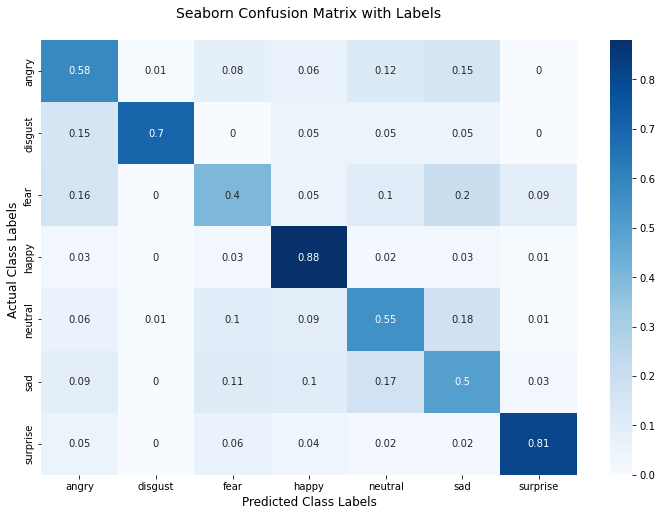

In [80]:
import seaborn as sns


plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
#plt.tight_layout()

ax.set_title('Seaborn Confusion Matrix with Labels\n', size=14);
ax.set_xlabel('Predicted Class Labels', size=12)
ax.set_ylabel('Actual Class Labels ', size=12);

## Ticket labels
ax.xaxis.set_ticklabels(Classes)
ax.yaxis.set_ticklabels(Classes)
plt.tick_params(axis="both", labelsize=10)
## Display the visualization of the Confusion Matrix.

plt.show()